# Bootstrap Agenda
* Very powerful tool in statistics. Lets us see the sampling distribution of our population. Easy was to do stats when sampling is difficult. 
* In this tutorial we will look at the best combination of two investments to maximize profits.

# Calculating our optimal investment metric

if we have a scenerio with two choices to put our money into, the optimal amount to put into stock 1 ($\alpha$) and stock 2 ($1-\alpha$) is given by the following formula

$\alpha = \frac{Var(y) - Cov(x,y)}{Var(x) + Var(y) - 2Cov(x,y)}$

We use bootstrap because we do not know Var(y) and Var(x)! This lets us estimate our SE(x) and mean(x) via the $\hat {SE}$ and $\hat \mu$.

In [4]:
library(MASS)
library(ISLR)
library(boot)

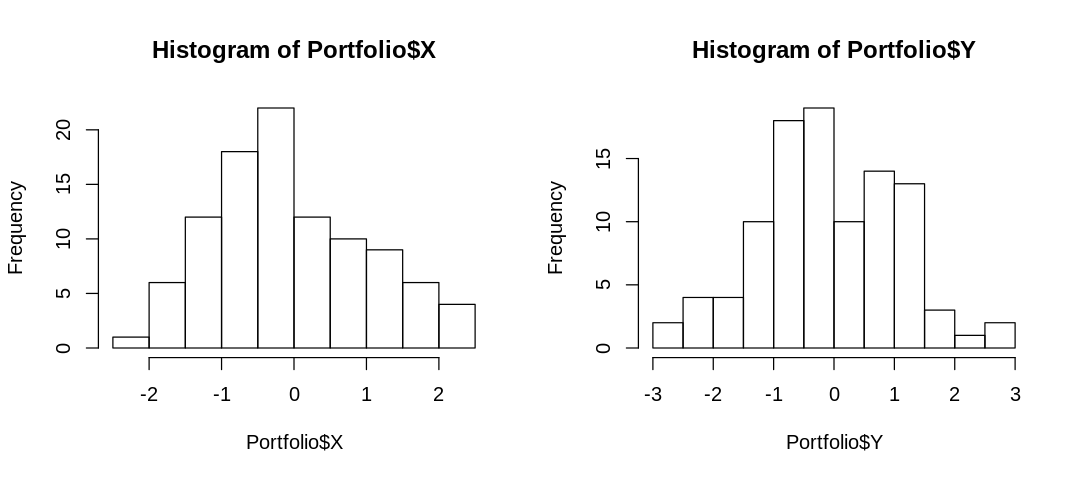

Portfolio {ISLR},R Documentation


In [30]:
options(repr.plot.height = 4, repr.plot.width=9)
help(Portfolio)
par(mfrow=c(1,2))
hist(Portfolio$X)
hist(Portfolio$Y)

In [6]:
alpha=function(x,y){
    vx = var(x)
    vy = var(y)
    cxy = cov(x,y)
    (vy-cxy)/(vx+vy-2*cxy)
}

In [11]:
alpha(Portfolio$X, Portfolio$Y)

[1] 0.5758321

Okay this 0.575 number is our $\hat \mu$, or an estimate of the true population mean from a sample, but how confident are we that this is the true population mean? We could get 1000 more samples from the population, compute their means to get ${SE}$, but that is expensive. The alternaitive is to treat our ```Portfolio``` sample as our population, and sample from it *new datasets* to estimate a $\hat {SE}$

In [12]:
# Helper function to calculate alpha for a given DF
alpha.fn <- function(query.df, index){
    with(query.df[index,], alpha(X,Y))
}

# Test of function
alpha.fn(Portfolio, 1:100)

[1] 0.5758321

So we have a function that can compute our alpha, apparently there is just a handy dandy built in function called ```boot``` that takes the
1. dataframe
2. function
3. number of times to run


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 10000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.5758321 0.002262244  0.09272436

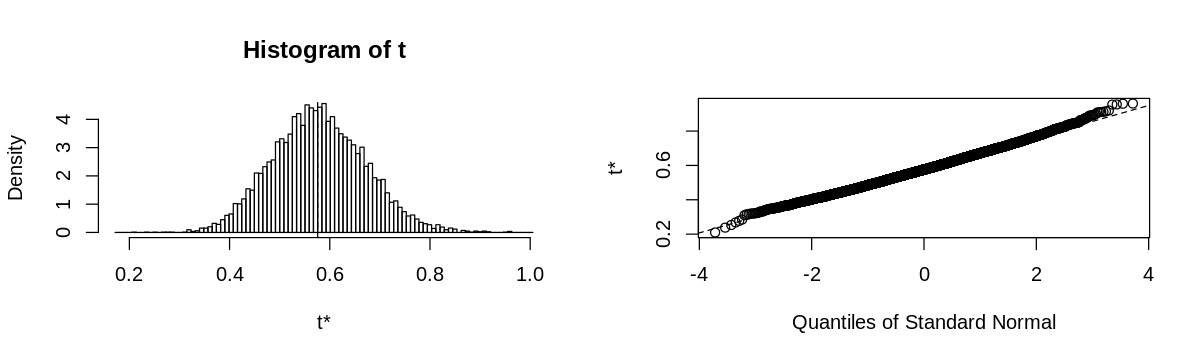

In [23]:
options(repr.plot.height = 3, repr.plot.width = 10)
set.seed(41)
boot.out <- boot(Portfolio, alpha.fn, R=10000)
boot.out
plot(boot.out)

# Conclusion

This method is very handy if you want a standard error measurement that is very tough to aquire from the population, or mathematically derive.